<a href="https://colab.research.google.com/github/Gideon-Tee/Gideon-Tee/blob/main/project_ghanaian_food_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics


In [ ]:
#install yolov8
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x33FQsYM41mjZn1HQHd4")
project = rf.workspace("final-year-project-eaxzy").project("ghanaian-food")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`


In [13]:
#import dataset from roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x33FQsYM41mjZn1HQHd4")
project = rf.workspace("final-year-project-eaxzy").project("ghanaian-food")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/content/Ghanaian-food-4/data.yaml \
epochs=80 \
imgsz=640 \
plots=True

100% 21.5M/21.5M [00:00<00:00, 169MB/s]
Ultralytics YOLOv8.1.31 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Ghanaian-food-4/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)


In [ ]:
!yolo task=detect \
mode=val \
model=/content/runs/detect/train/weights/best.pt \
data=/content/Ghanaian-food-4/data.yaml


Ultralytics YOLOv8.1.31 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Ghanaian-food-4/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.16it/s]
                   all         20         34      0.848      0.763       0.88      0.553
                  fufu         20          9      0.759      0.556      0.812      0.575
                jollof         20          6          1      0.996      0.995      0.607
                kenkey         20         19      0.786      0.737      0.832      0.477
Speed: 0.3ms preprocess, 27.6ms inference, 0.0ms loss, 37.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Ghanaian-food-4/test/images save=True

Ultralytics YOLOv8.1.31 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/Ghanaian-food-4/test/images/1c898243-c77b-4f0f-b66d-f262cddefd8f_jpg.rf.d1b89bd815ffdffac567ef8b761bb727.jpg: 640x640 2 jollofs, 1 kenkey, 16.4ms
image 2/11 /content/Ghanaian-food-4/test/images/312796ec-be03-4041-8e66-8d21bd9fcf6e_jpg.rf.e5db172d29580892d83a20d29d629c04.jpg: 640x640 1 fufu, 16.4ms
image 3/11 /content/Ghanaian-food-4/test/images/Cocoa-Ama-Duah_jpg.rf.c6d96a4d1f35eac3e0757eea7d39aadd.jpg: 640x640 4 kenkeys, 16.3ms
image 4/11 /content/Ghanaian-food-4/test/images/Delicious-Homemade-Kenkey-Made-From-Scratch-Upon-Order-Etsy_jpg.rf.6c733747d12e50ceb00c7c64980a3145.jpg: 640x640 5 kenkeys, 16.3ms
image 5/11 /content/Ghanaian-food-4/test/images/Fufu-s-Many-Faces_jpg.rf.67cc6dad6682888875e33acfec6ce01d.jpg: 640x640 2 fufus, 16.3ms
image 6/11 /content/Ghanaian-food-4/test/images/How-to-cook-Joll

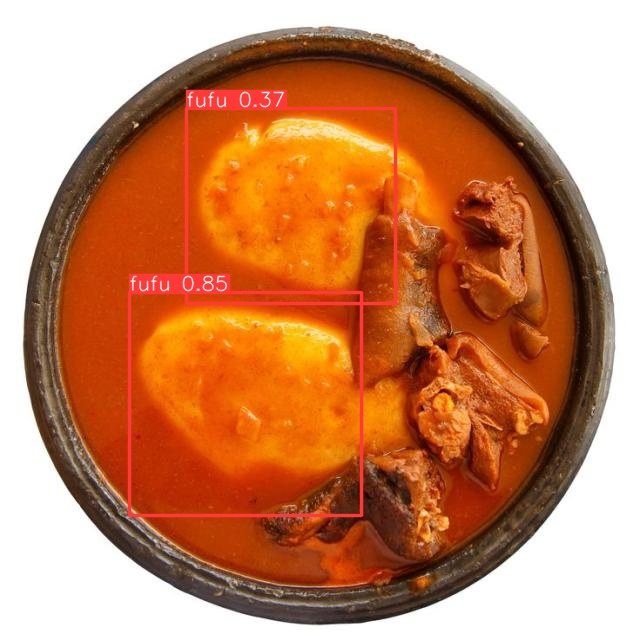

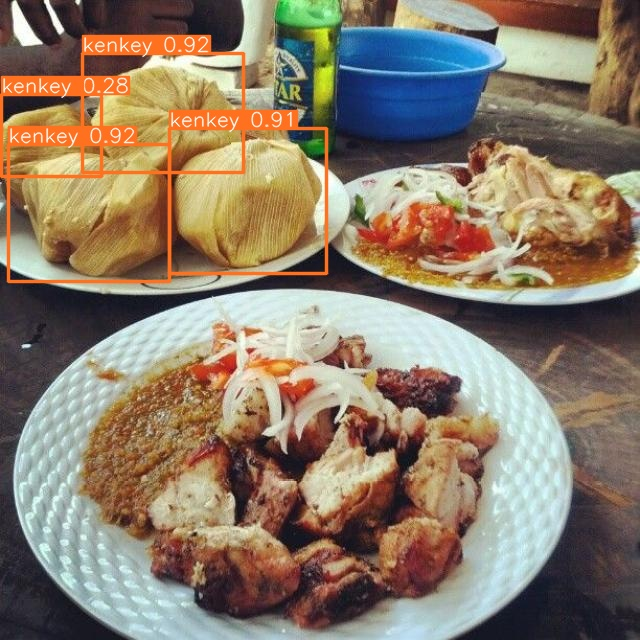

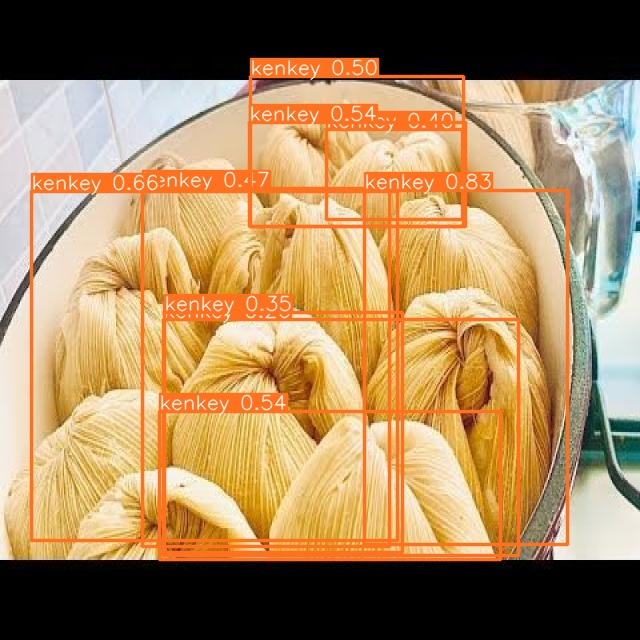

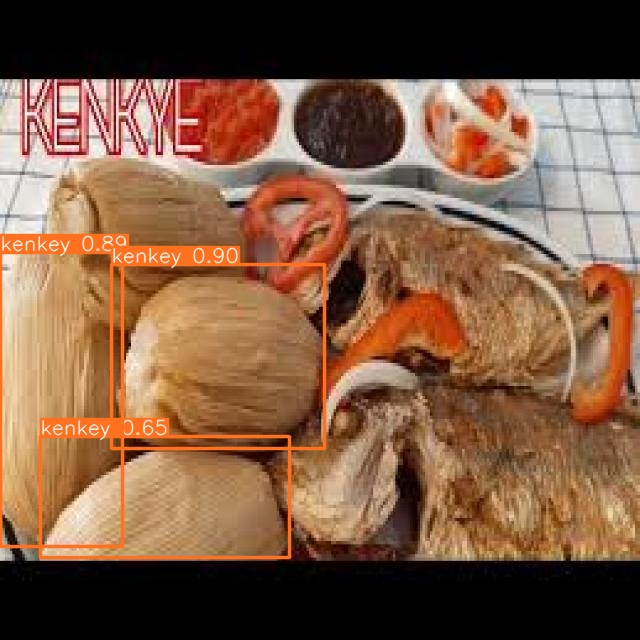

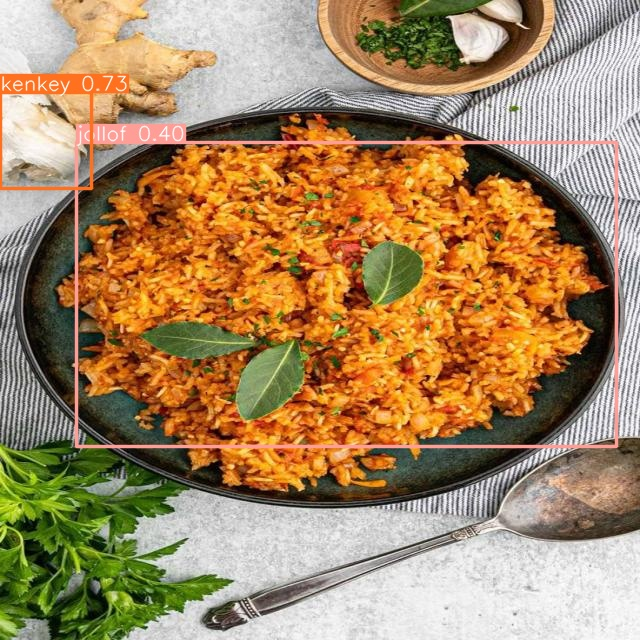

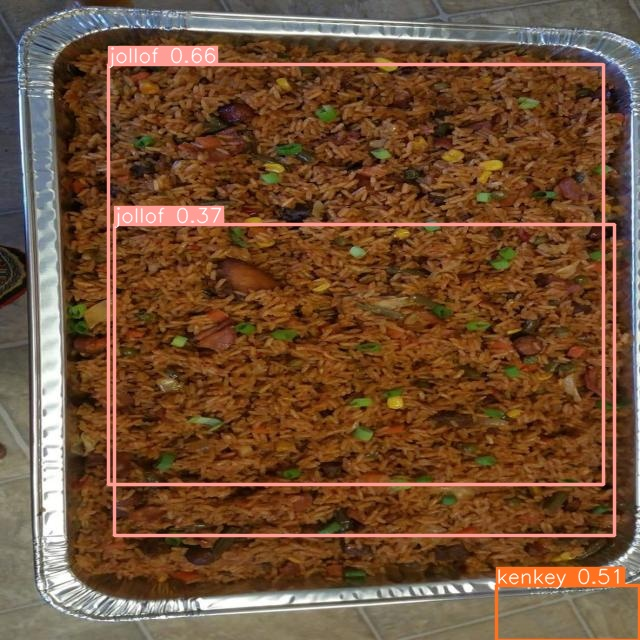

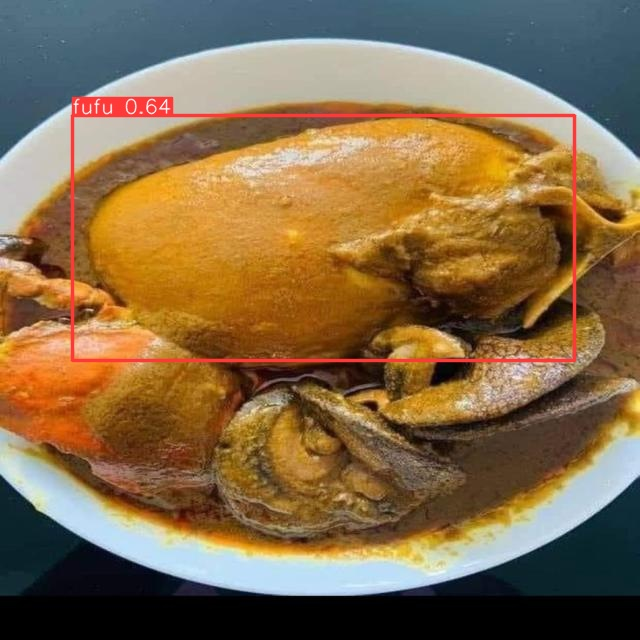

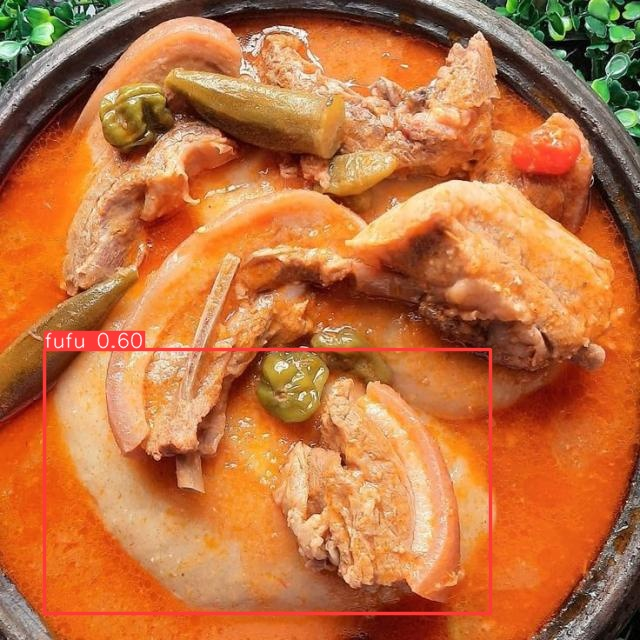

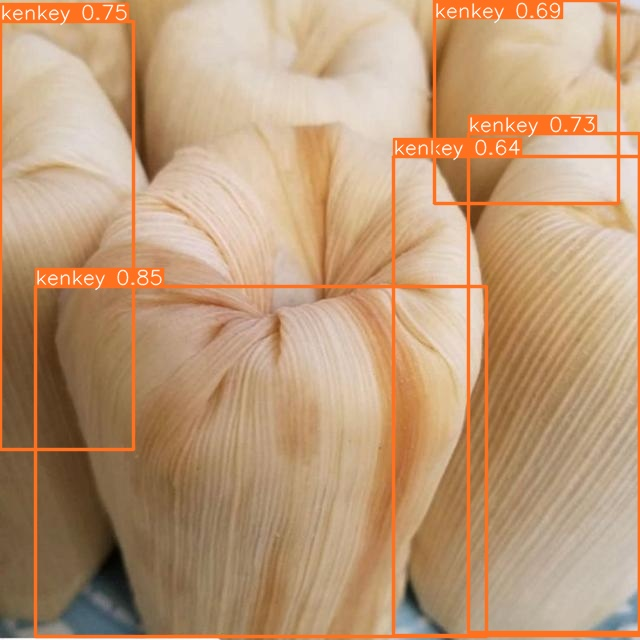

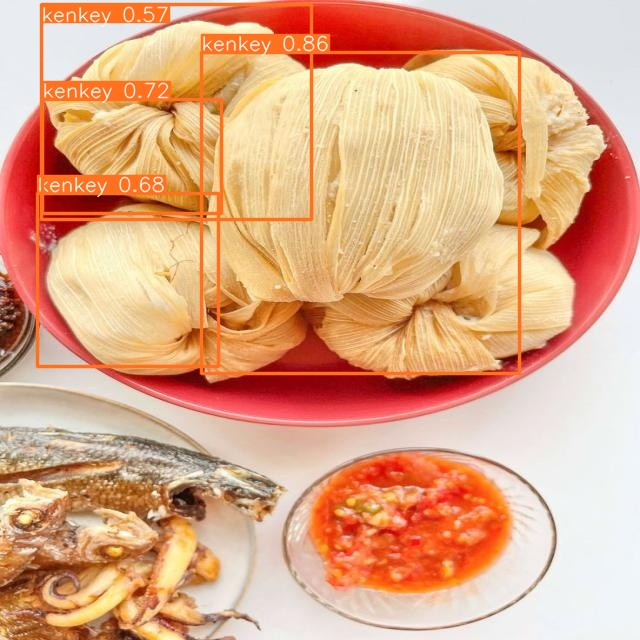

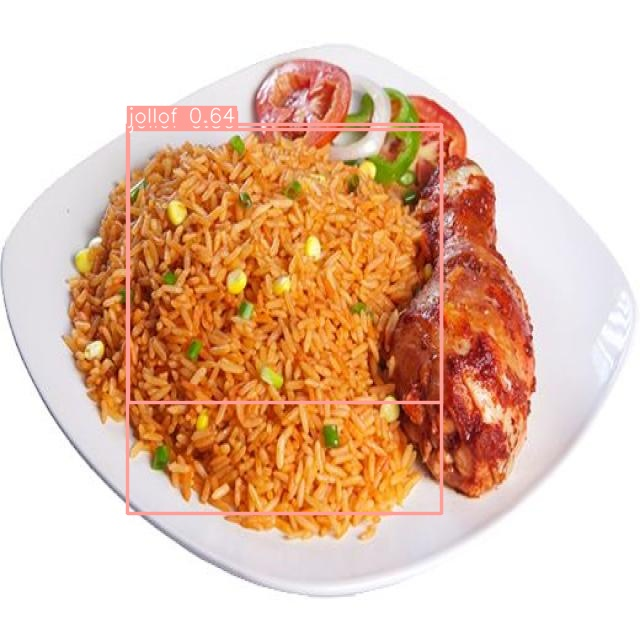

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=400))
      print("\n")